In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("globalWarming.csv")
data.drop("Unnamed: 0", axis = 1, inplace=True)

In [3]:
data.head()

,date,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167
1,1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083
2,1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417
3,1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833
4,1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417


In [4]:
data = data[[c for c in data if c != "LandAverageTemperature"] + ["LandAverageTemperature"]]

In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((116, 8), (50, 8), (116,), (50,))

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train, y_train)

StandardScaler()

In [8]:
from sklearn.linear_model import LinearRegression
ridge_logit = LinearRegression()
ridge_logit.fit(X_train, y_train)

LinearRegression()

In [9]:
ridge_logit.coef_ 

array([ 1.08144471e-03,  1.96118031e+00,  1.79133465e-01, -3.28632425e-01,
        3.03720084e-01, -1.54261698e-01,  7.28265166e-01, -1.83368013e+00])

In [10]:
np.sum(ridge_logit.coef_ >= 0)

5

In [11]:
data.columns

Index(['date', 'LandAverageTemperatureUncertainty', 'LandMaxTemperature',
       'LandMaxTemperatureUncertainty', 'LandMinTemperature',
       'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'LandAverageTemperature'],
      dtype='object')

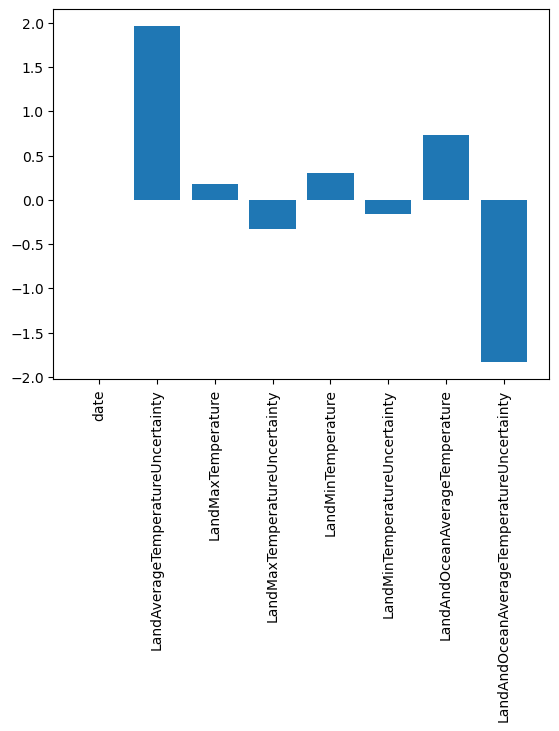

In [12]:
importance = ridge_logit.coef_[0]
plt.bar(['date', 'LandAverageTemperatureUncertainty', 'LandMaxTemperature',
       'LandMaxTemperatureUncertainty', 'LandMinTemperature',
       'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'], ridge_logit.coef_)
plt.xticks(rotation = 'vertical')
plt.show()

installing MLXtend framework to compute the combination with highest model accuracy

In [17]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings

In [20]:
warnings.filterwarnings('ignore')
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=5, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(X, y)


[2024-05-11 22:33:28] Features: 1/5 -- score: -0.017429347213889664
[2024-05-11 22:33:28] Features: 2/5 -- score: -0.014466713748387266
[2024-05-11 22:33:28] Features: 3/5 -- score: -0.017559991130665902
[2024-05-11 22:33:28] Features: 4/5 -- score: -0.018125921296221183
[2024-05-11 22:33:28] Features: 5/5 -- score: -0.01802156727177446

In [15]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['date', 'LandAverageTemperatureUncertainty', 'LandMaxTemperature', 'LandMinTemperature', 'LandAndOceanAverageTemperature']


In [22]:
modified_data = data[feat_names]
modified_data['Temperature'] = data['LandAverageTemperature']
modified_data.head()

,date,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,Temperature
0,1850,0.876417,13.476667,1.964333,14.867167,7.900667
1,1851,0.881917,13.081000,2.203917,14.991833,8.178583
2,1852,0.918250,13.397333,2.337000,15.006500,8.100167
3,1853,0.835000,13.886583,1.892500,14.955167,8.041833
4,1854,0.825667,13.977417,1.762167,14.991000,8.210500


In [34]:
X = modified_data.iloc[:, :-1]
y = modified_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, y_train.shape, X_test.shape, 

((132, 5), (132,), (34, 5))

In [36]:
scaler = StandardScaler()
scaler.fit(X_train, y_train)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [39]:
pred = reg.predict(X_test)
pred

array([8.4073603 , 9.05271586, 8.76402264, 8.31251369, 8.27909637,
       8.62435405, 7.98434782, 8.1257469 , 8.28607397, 8.49237122,
       9.39761184, 8.88843637, 8.07072252, 8.92764595, 8.00281675,
       8.7567867 , 8.29991206, 9.23524026, 8.57697873, 8.74745865,
       9.42673579, 8.10100149, 8.73865438, 8.8610288 , 8.32249132,
       8.13474884, 8.33114517, 8.33594877, 8.10642033, 8.44869087,
       9.6227319 , 9.50252553, 8.72471912, 7.79845261])

In [33]:
from sklearn.metrics import root_mean_squared_error as rmse

In [40]:
rmse(pred, y_test)

0.0862611783494286